In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 2.1MB 7.5MB/s 
     |████████████████████████████████| 1.2MB 39.9MB/s 
     |████████████████████████████████| 901kB 36.9MB/s 
     |████████████████████████████████| 3.3MB 41.8MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.4-cp37-none-any.whl size=114307 sha256=2a06ef3c4c1ff178486d51cd2f2bd1295408c43e5374b2e2a1c2ffb952f5e6fc
  Stored in directory: /root/.cache/pip/wheels/26/ea/89/d0d2e013d951b6d23270aa9ca4018b82632ab7cd933c331316
Successfully built sentence-transformers


In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/kazzyabe/Bert-based_Explanation/master/bert-based_explanation/data_bert_abstract.csv'

In [ ]:
data = pd.read_csv(url)

In [ ]:
data

,query,citation,decision
0,Lexicon-Based Methods for Sentiment Analysis ...,Amazon Mechanical Turk for Subjectivity Word ...,1
1,Lexicon-Based Methods for Sentiment Analysis ...,Mining WordNet for Fuzzy Sentiment: Sentimen...,1
2,Lexicon-Based Methods for Sentiment Analysis ...,When Specialists and Generalists Work Togethe...,0
3,Lexicon-Based Methods for Sentiment Analysis ...,Distilling Opinion in Discourse: A Preliminar...,0
4,Lexicon-Based Methods for Sentiment Analysis ...,SENTIWORDNET 3.0: An Enhanced Lexical Resourc...,1
...,...,...,...
95,Learning Subjective Language Theresa Wilson ...,Similarity-Based Estimation of Word Cooccurre...,1
96,Learning Subjective Language Theresa Wilson ...,Recognizing Expressions of Commonsense Psycho...,1
97,Learning Subjective Language Theresa Wilson ...,Automatic Detection of Text Genre Xerox Palo...,0
98,Learning Subjective Language Theresa Wilson ...,Building a Large Annotated Corpus of English:...,1


In [ ]:
test = data.loc(0)

In [ ]:
test[0]

query        Lexicon-Based Methods for Sentiment Analysis ...
citation     Amazon Mechanical Turk for Subjectivity Word ...
decision                                                    1
Name: 0, dtype: object

## Bert Embeddings and similarity

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

In [ ]:
emb1 = model.encode(test[0]['query'])

In [ ]:
emb1

array([-7.92179629e-02,  1.43447638e-01,  3.48825045e-02,  1.00453429e-01,
       -2.44085819e-01,  2.64541596e-01,  6.26787618e-02,  1.24122724e-01,
        2.38916725e-01,  1.40800819e-01,  9.28694531e-02, -1.53008431e-01,
       -5.04332073e-02, -2.08792642e-01,  4.84189630e-01, -5.24679124e-01,
       -2.48965308e-01,  2.66872108e-01,  2.65130758e-01, -3.62376630e-01,
       -2.03113183e-01, -2.58812487e-01, -5.84234774e-01, -5.76784275e-03,
        1.56039983e-01,  4.26899791e-01,  1.20357268e-01,  2.96965033e-01,
       -3.75888169e-01,  3.25945318e-01, -1.33425251e-01, -8.19215328e-02,
       -2.28072256e-01,  3.41555700e-02, -5.05156875e-01, -1.31687149e-01,
        1.43502146e-01,  2.59144515e-01, -4.44411337e-01,  1.41337395e-01,
        2.86842287e-01,  5.62809527e-01, -3.59770894e-01,  4.68921244e-01,
       -1.23148570e-02, -1.36102557e-01, -7.73691654e-01, -1.07130551e+00,
        2.52524726e-02, -1.10799976e-01,  4.01372790e-01,  1.21481717e-01,
        1.39492363e-01,  

In [ ]:
emb2 = model.encode(test[0]['citation'])

In [ ]:
cos_sim = util.pytorch_cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.3066]])


In [ ]:
print("Cosine-Similarity:", cos_sim.item())

Cosine-Similarity: 0.30656397342681885


In [ ]:
def cos_sim(d):
  emb1 = model.encode(d['query'])
  emb2 = model.encode(d['citation'])
  cos_sim = util.pytorch_cos_sim(emb1, emb2)
  return cos_sim.item()

In [ ]:
data['cos_sim'] = data.apply(lambda d: cos_sim(d), axis=1)

In [ ]:
data['cos_sim']

0     0.306564
1     0.526880
2     0.316767
3     0.386031
4     0.419494
        ...   
95    0.537981
96    0.591112
97    0.461797
98    0.376774
99    0.433764
Name: cos_sim, Length: 100, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = data['cos_sim']
y = data['decision']

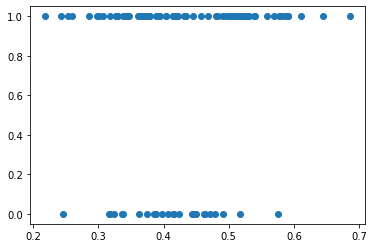

In [ ]:
plt.scatter(x,y)

In [ ]:
data.to_csv('cos_sim.csv', index=False)

## Downloading 

In [ ]:
from google.colab import files
files.download("cos_sim.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>